In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load Data
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [36]:
# Shape
print("Shape:", df.shape)

# Column types
print(df.info())

# Summary statistics
df.describe()


Shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [37]:


binary_like = [0,1]
cont_vars = []

for col in df.columns:
    if df[col].nunique() > 3 and df[col].dtype != 'object':
        cont_vars.append(col)

print("Continuous Variables:", cont_vars)


Continuous Variables: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


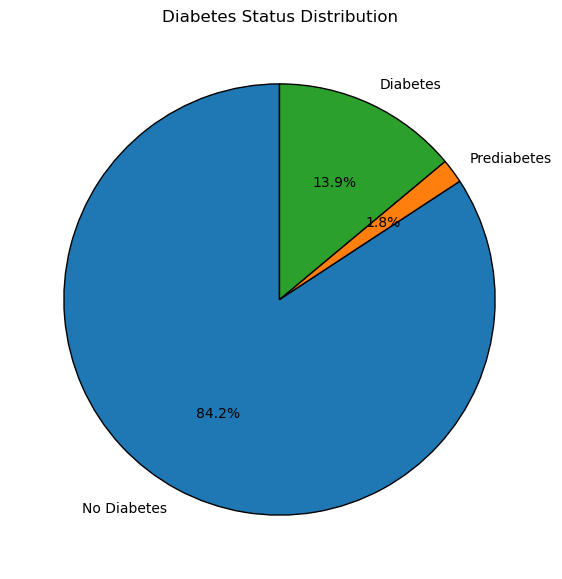

In [70]:
counts = df["Diabetes_012"].value_counts().sort_index()
labels = ["No Diabetes", "Prediabetes", "Diabetes"]

plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Diabetes Status Distribution")
plt.show()


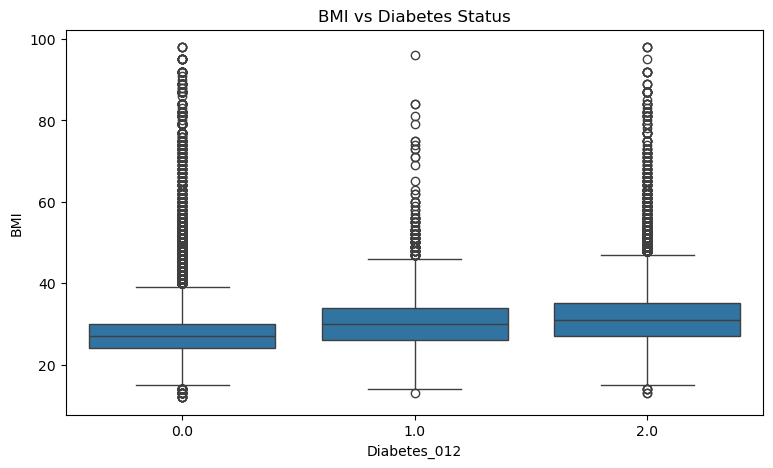

In [40]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Diabetes_012", y="BMI", data=df)
plt.title("BMI vs Diabetes Status")
plt.show()


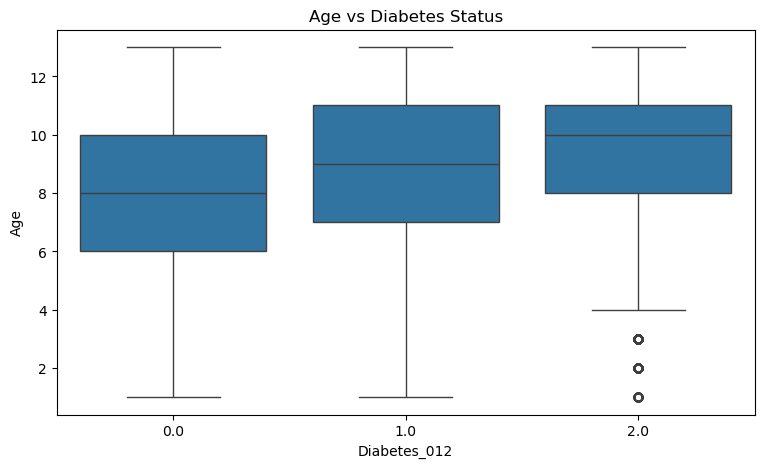

In [41]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Diabetes_012", y="Age", data=df)
plt.title("Age vs Diabetes Status")
plt.show()


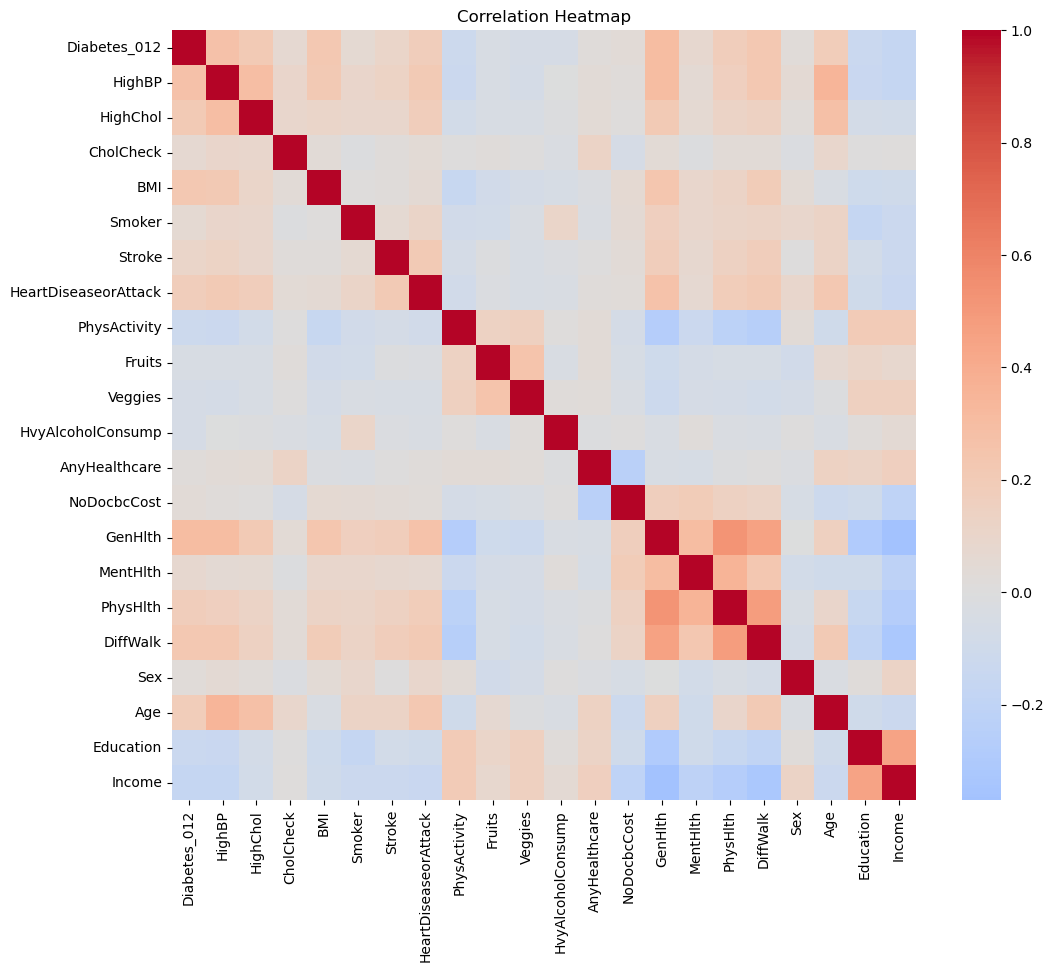

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


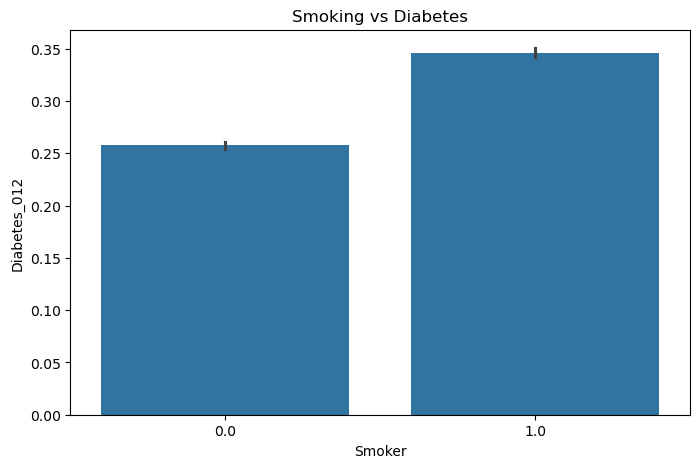

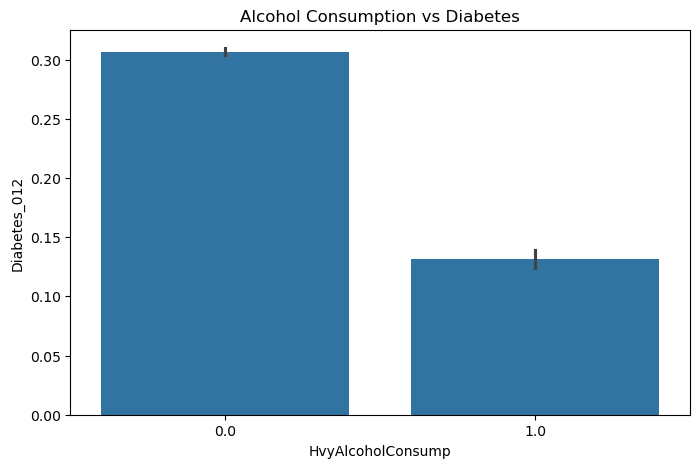

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x="Smoker", y="Diabetes_012", data=df)
plt.title("Smoking vs Diabetes")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="HvyAlcoholConsump", y="Diabetes_012", data=df)
plt.title("Alcohol Consumption vs Diabetes")
plt.show()


In [59]:
# Task A: 0 vs (1+2)
df["y_A"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# Task B: (0+1) vs 2
df["y_B"] = df["Diabetes_012"].apply(lambda x: 1 if x == 2 else 0)

X = df.drop(["Diabetes_012", "y_A", "y_B"], axis=1)

X_train, X_test, yA_train, yA_test, yB_train, yB_test = train_test_split(
    X, df["y_A"], df["y_B"], test_size=0.25, random_state=42
)

def run_models(X_train, X_test, y_train, y_test, task_name="Task"):
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    y_prob_lr = lr.predict_proba(X_test)[:, 1]
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:, 1]

    return {
        "lr_model": lr,
        "rf_model": rf,
        "lr_prob": y_prob_lr,
        "rf_prob": y_prob_rf
    }
results_A = run_models(X_train, X_test, yA_train, yA_test, task_name="Task A (0 vs 1+2)")
results_B = run_models(X_train, X_test, yB_train, yB_test, task_name="Task B (0/1 vs 2)")


/Users/fuminli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fuminli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

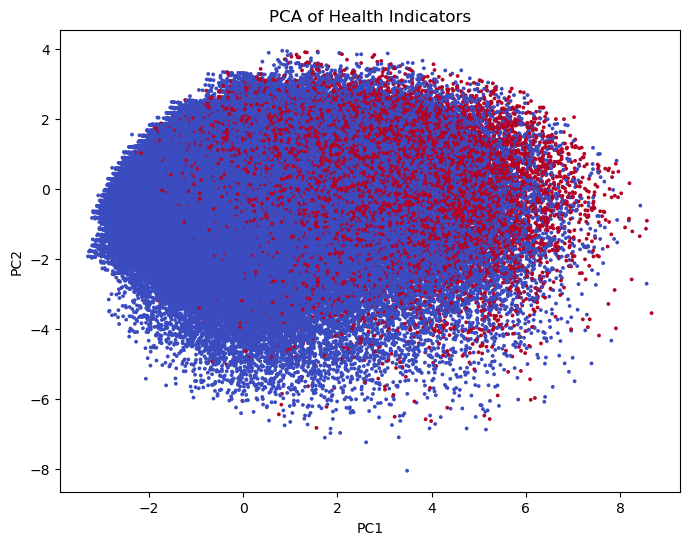

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], c=y, cmap='coolwarm', s=3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Health Indicators")
plt.show()


In [61]:
print("\n===== Key Findings =====")
print("- People with diabetes tend to have higher BMI.")
print("- Older age groups have higher diabetes prevalence.")
print("- Smoking and heavy alcohol consumption correlate with diabetes.")
print("- Logistic Regression achieves AUC around:",
      round(roc_auc_score(y_test, y_prob), 3))
print("- PCA shows partial separation but not perfect clusters.")



===== Key Findings =====
- People with diabetes tend to have higher BMI.
- Older age groups have higher diabetes prevalence.
- Smoking and heavy alcohol consumption correlate with diabetes.
- Logistic Regression achieves AUC around: 0.825
- PCA shows partial separation but not perfect clusters.


In [62]:
def evaluate_model_performance(y_test, lr_prob, rf_prob, lr_pred, rf_pred, task_name):

    print(f"\n\n==============================")
    print(f" Performance Comparison — {task_name}")
    print("==============================")

    # --- AUC ---
    auc_lr = roc_auc_score(y_test, lr_prob)
    auc_rf = roc_auc_score(y_test, rf_prob)

    # --- Precision ---
    precision_lr = precision_score(y_test, lr_pred)
    precision_rf = precision_score(y_test, rf_pred)

    # --- AUPRC (average precision) ---
    auprc_lr = average_precision_score(y_test, lr_prob)
    auprc_rf = average_precision_score(y_test, rf_prob)

    # Print table
    perf_table = pd.DataFrame({
        "Model": ["Logistic Regression", "Random Forest"],
        "AUC": [auc_lr, auc_rf],
        "Precision": [precision_lr, precision_rf],
        "AUPRC": [auprc_lr, auprc_rf]
    })

    print(perf_table.to_string(index=False))
    return perf_table


In [63]:
yA_test_arr = yA_test.values

perf_A = evaluate_model_performance(
    yA_test_arr,
    results_A["lr_prob"],
    results_A["rf_prob"],
    lr_pred=results_A["lr_model"].predict(X_test),
    rf_pred=results_A["rf_model"].predict(X_test),
    task_name="Task A (0 vs 1+2)"
)




 Performance Comparison — Task A (0 vs 1+2)
              Model      AUC  Precision    AUPRC
Logistic Regression 0.818846   0.552976 0.431016
      Random Forest 0.796970   0.503217 0.397579


In [64]:
yB_test_arr = yB_test.values

perf_B = evaluate_model_performance(
    yB_test_arr,
    results_B["lr_prob"],
    results_B["rf_prob"],
    lr_pred=results_B["lr_model"].predict(X_test),
    rf_pred=results_B["rf_model"].predict(X_test),
    task_name="Task B (0/1 vs 2)"
)




 Performance Comparison — Task B (0/1 vs 2)
              Model      AUC  Precision    AUPRC
Logistic Regression 0.824546   0.540437 0.405123
      Random Forest 0.802186   0.490183 0.369679


In [65]:
def plot_roc(y_test, lr_prob, rf_prob, title):
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

    auc_lr = roc_auc_score(y_test, lr_prob)
    auc_rf = roc_auc_score(y_test, rf_prob)

    plt.figure(figsize=(7,6))
    plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.3f})", linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={auc_rf:.3f})", linewidth=2)

    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


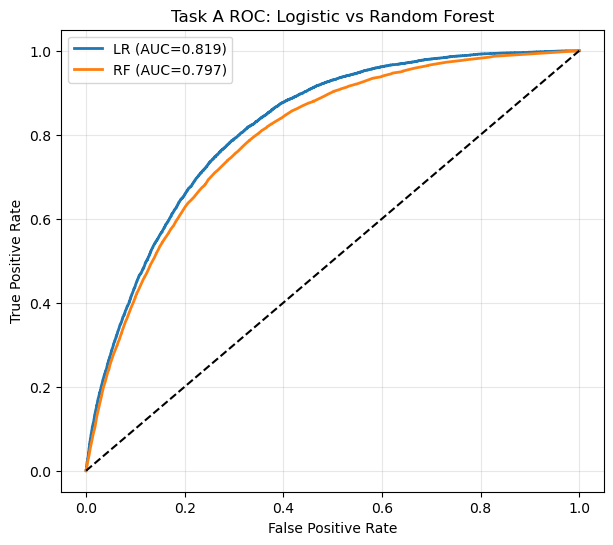

In [66]:
plot_roc(yA_test, results_A["lr_prob"], results_A["rf_prob"], 
         "Task A ROC: Logistic vs Random Forest")


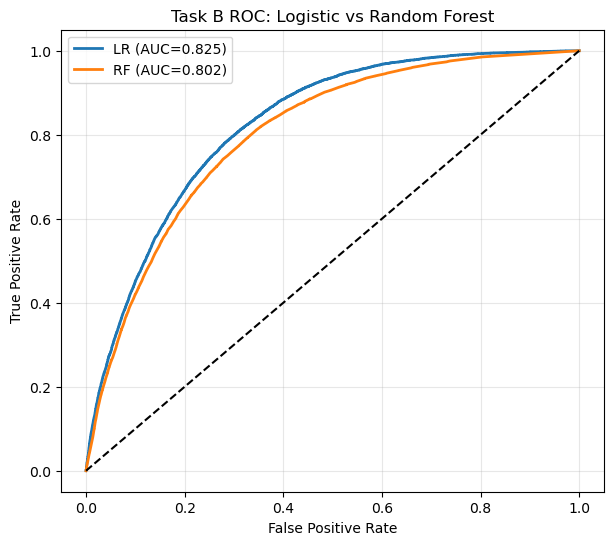

In [67]:
plot_roc(yB_test, results_B["lr_prob"], results_B["rf_prob"], 
         "Task B ROC: Logistic vs Random Forest")


In [68]:
def plot_metric_bars(perf_table, title):
    plt.figure(figsize=(8,6))
    perf_table_melt = perf_table.melt(id_vars="Model", var_name="Metric", value_name="Value")

    sns.barplot(data=perf_table_melt, x="Metric", y="Value", hue="Model")
    
    plt.title(title)
    plt.ylabel("Score")
    plt.grid(axis='y', alpha=0.2)
    plt.show()


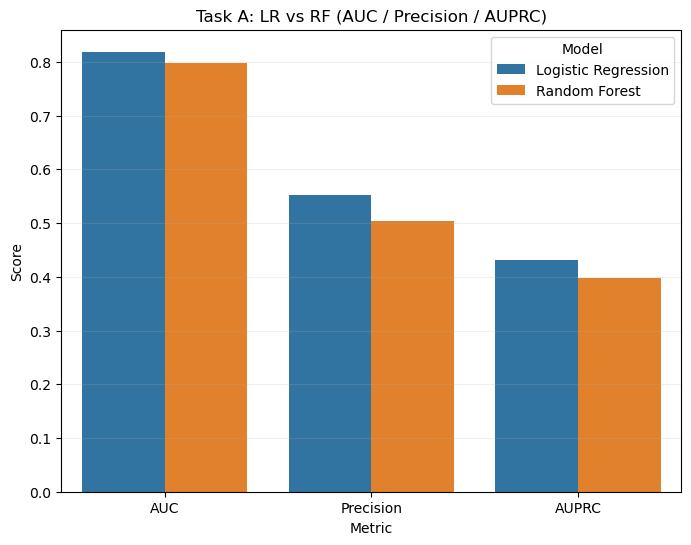

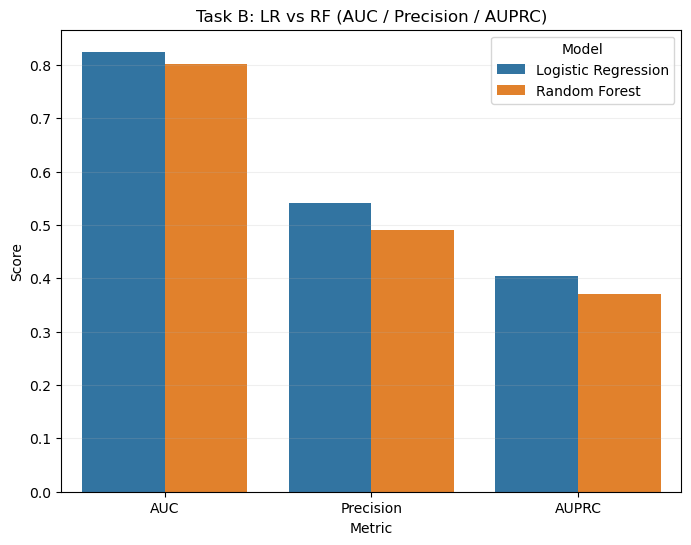

In [69]:
plot_metric_bars(perf_A, "Task A: LR vs RF (AUC / Precision / AUPRC)")
plot_metric_bars(perf_B, "Task B: LR vs RF (AUC / Precision / AUPRC)")
